In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
np.set_printoptions(threshold=np.inf)  #使输出数据完整显示

src_dir='/home/zhaobenyan/repos/patchV1/src/'
patchfast='/home/zhaobenyan/dataset/patchfast/'


In [9]:
def replace(dir):
    '''
    dir:grating所在地址
    '''
    #step1:将minimal.cfg中的替死鬼文件中的数据换成实验输入
    with open(dir) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
        #写文件,'wb'表示覆盖写文件 f1打开“替死鬼”文件地址 注意要修改minimal.cfg对应的fStimulus
        f1 = open('/home/zhaobenyan/dataset/resource/static_color-grid_0.bin', 'wb') 
        np.array(x_1).astype('i4').tofile(f1) 
        np.array((x_2[0],size,size), dtype='i4').tofile(f1)
        x_3.astype('f4').tofile(f1) # init_luminance
        np.array(x_4, dtype='f4').tofile(f1)
        np.array(x_5).astype('u4').tofile(f1)
        np.array(x_6).astype('f4').tofile(f1)
        f1.close() #记得要关文件

In [3]:
#读取grating的数据  file:文件路径 static_color-grid_{}.bin类型的文件.size:图片大小
def read_grating_bin(file):
    with open(file) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
    return x_1,x_2,x_3,x_4,x_5,x_6

In [5]:
#运行patchfast，生成文件储存在/home/zhaobenyan/dataset/patchfast
def patch():
    os.system(f'cd {patchfast} && patch_fast -c {src_dir}minimal.cfg') 
#运行minimalTC与运行patchfast效果一样
def minimalTC():
   os.system(f'cd {src_dir} && ./minimalTC')

In [6]:
def read_spike(file):
    with open(file) as f:
        sampleSize = np.fromfile(f, 'u4', 1)[0] #一共5120
        sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#t0是开始时间，t1是结束时间，我一共跑了1s
        nt = np.fromfile(f, 'u4', 1)[0]
        nLGN = np.fromfile(f, 'u4', 1)[0]
        LGN_spike_time = np.fromfile(f, 'u4', nLGN*nt)
        sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
        sample_spikeCount = np.fromfile(f, 'u4', sampleSize)
        fr = sample_spikeCount/(sample_t1-sample_t0)*1000
    LGN_spike_time = LGN_spike_time.reshape((nt,nLGN)).T
    return sampleID,fr

In [13]:
#文件地址
contrast0='/home/zhaobenyan/dataset/resource/static_color-grid_0.bin'
contrast3='/home/zhaobenyan/dataset/grating/grating_32x32_frameRate96/static_color-grid_6.bin'
contrast6='/home/zhaobenyan/dataset/grating/grating_32x32_frameRate96/static_color-grid_10.bin'

---------替死鬼文件----------
[-1] [12 32 32] [0.5 0.5 0.5] [0.05110313 0.0344    ] [1]
36864
repeat_test
overwrite contents in /home/zhaobenyan/dataset/repeat_test
configuration files copied
one_ori=1
plotting files copied


(array([213., 293., 323., 325., 299., 271., 307., 313., 273., 255., 216.,
        174., 132., 122.,  98.,  72.,  48.,  40.,  22.,  13.,  12.,   4.,
          5.,   4.,   2.,   2.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

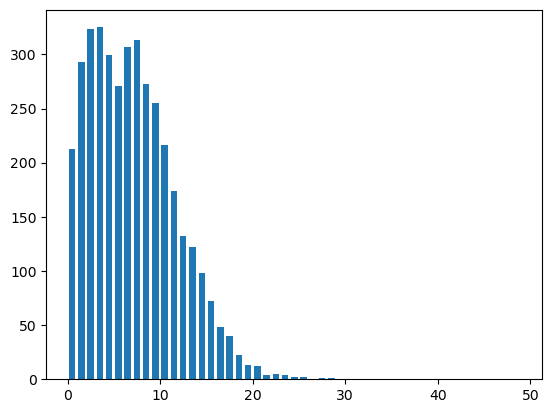

In [14]:
print('---------替死鬼文件----------')#[-1] [12 32 32] [0.5 0.5 0.5] [0.05110313 0.0344    ] [1]
#先将/home/zhaobenyan/dataset/resource/static_color-grid_3.bin复制一份并将后缀改为0作为替死鬼
#resource文件夹下的数据是从/home/zhaobenyan/dataset/grating/grating_32x32_frameRate96/下复制的
x_1,x_2,x_3,x_4,x_5,x_6=read_grating_bin(contrast0)
print(x_1,x_2,x_3,x_4,x_5)
print(len(x_6))
#print(x_6)#此时读的实际上就是static_color-grid_3.bin的数据

#patch()
minimalTC()#此时cfg文件的fStimulus = static_color-grid_0.bin
sampleID,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)

-----------实验文件-------------
36864
[-1] [12 32 32] [0.5 0.5 0.5] [0.05110313 0.0344    ] [1]
[2.76605505e-02 3.68293114e-02 2.76153386e-01 6.26709640e-01
 9.14302289e-01 9.96022940e-01 8.31263542e-01 5.01895130e-01
 1.71585009e-01 4.46840981e-03 8.35876763e-02 3.69627446e-01
 7.20450997e-01 9.61729646e-01 9.73569095e-01 7.50086069e-01
 4.02332157e-01 1.03110634e-01 1.10840995e-03 1.47011682e-01
 4.68319267e-01 8.05369437e-01 9.90677655e-01 9.32162046e-01
 6.58899665e-01 3.06678057e-01 5.05205430e-02 1.77150238e-02
 2.24562958e-01 5.68279028e-01 8.78066361e-01 9.99987781e-01
 1.66940573e-03 1.52413845e-01 4.75878209e-01 8.11329007e-01
 9.92076516e-01 9.28305030e-01 6.51703417e-01 2.99718469e-01
 4.72559407e-02 1.97676141e-02 2.30912790e-01 5.75770795e-01
 8.82977307e-01 9.99877632e-01 8.68382454e-01 5.53833425e-01
 2.12533906e-01 1.40798800e-02 5.70856594e-02 3.20181131e-01
 6.72630847e-01 9.39298153e-01 9.87672687e-01 7.93716550e-01
 4.53808963e-01 1.36854291e-01 3.51292896e-04 1.12130

(array([206., 294., 330., 299., 318., 302., 303., 296., 259., 259., 200.,
        176., 142., 132., 103.,  66.,  48.,  38.,  21.,  17.,  10.,   5.,
          5.,   4.,   3.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

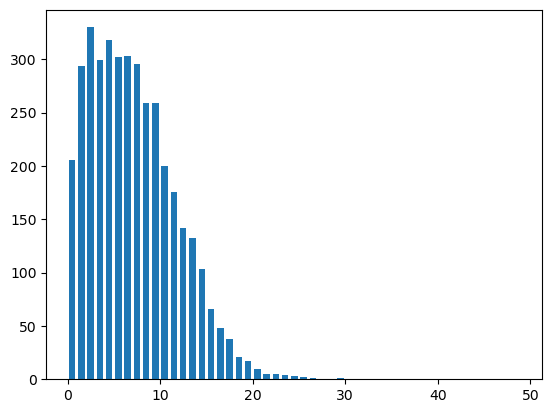

In [16]:
print('-----------实验文件-------------')
y_1,y_2,y_3,y_4,y_5,y_6=read_grating_bin(contrast6)
#读取/home/zhaobenyan/dataset/grating/grating_32x32_frameRate96/static_color-grid_6.bin作为实验文件
print(len(y_6))
print(y_1,y_2,y_3,y_4,y_5)
print(y_6)
#patch()
#minimalTC()#此时还没有替换，cfg文件改为fStimulus = static_color-grid_6.bin
sampleID,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)


--------replace之后----------
36864
[-1] [12 32 32] [0.5 0.5 0.5] [0.05110313 0.0344    ] [1]
[2.76605505e-02 3.68293114e-02 2.76153386e-01 6.26709640e-01
 9.14302289e-01 9.96022940e-01 8.31263542e-01 5.01895130e-01
 1.71585009e-01 4.46840981e-03 8.35876763e-02 3.69627446e-01
 7.20450997e-01 9.61729646e-01 9.73569095e-01 7.50086069e-01
 4.02332157e-01 1.03110634e-01 1.10840995e-03 1.47011682e-01
 4.68319267e-01 8.05369437e-01 9.90677655e-01 9.32162046e-01
 6.58899665e-01 3.06678057e-01 5.05205430e-02 1.77150238e-02
 2.24562958e-01 5.68279028e-01 8.78066361e-01 9.99987781e-01
 1.66940573e-03 1.52413845e-01 4.75878209e-01 8.11329007e-01
 9.92076516e-01 9.28305030e-01 6.51703417e-01 2.99718469e-01
 4.72559407e-02 1.97676141e-02 2.30912790e-01 5.75770795e-01
 8.82977307e-01 9.99877632e-01 8.68382454e-01 5.53833425e-01
 2.12533906e-01 1.40798800e-02 5.70856594e-02 3.20181131e-01
 6.72630847e-01 9.39298153e-01 9.87672687e-01 7.93716550e-01
 4.53808963e-01 1.36854291e-01 3.51292896e-04 1.121300

(array([ 86., 432., 126.,  68.,  64.,  68.,  69.,  61.,  77.,  99.,  96.,
         80.,  85., 101., 125., 112., 129., 127., 125., 134., 124., 125.,
        134., 136., 120., 104., 107.,  95.,  79.,  83.,  81.,  70.,  57.,
         59.,  45.,  27.,  24.,  30.,  12.,  10.,  17.,   9.,   7.,   4.,
          3.,   6.,   1.,   2.,   2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

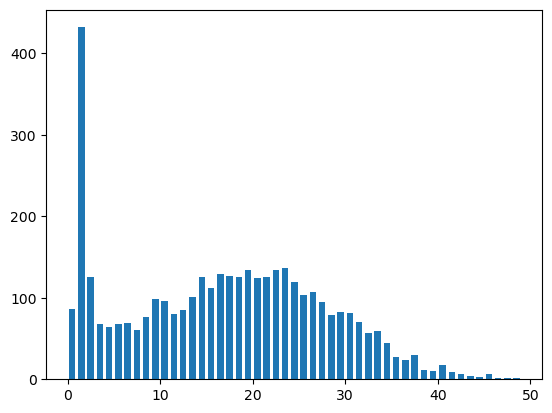

In [17]:
print('--------replace之后----------')
replace(contrast6)
z_1,z_2,z_3,z_4,z_5,z_6=read_grating_bin(contrast0)
#替换之后再次读取static_color-grid_0.bin，发现是替换成功了的，
#但是结果却与上一步直接将static_color-grid_6.bin作为输入不一样
print(len(z_6))
print(z_1,z_2,z_3,z_4,z_5)
print(z_6)
#patch()
minimalTC()
sampleID,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)